In [65]:
import numpy as np 
import healpy as hp 
import matplotlib.pyplot as plt 
import random
import math
import gif

In [66]:
def fibonacci_sphere(samples):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points

In [67]:
def gamma(v):
    return 1/np.sqrt(1-v**2)

def ChangeDir3D(nvec,vvec):
    n_unit=nvec/np.sqrt(np.dot(nvec,nvec))
    v_unit=vvec/np.sqrt(np.dot(vvec,vvec))
    v_mag=np.sqrt(np.dot(vvec,vvec))
    nv_dot=np.dot(n_unit,v_unit)
    gam=gamma(v_mag)
    fac1=((gam-1)*nv_dot+gam*v_mag)/(gam*(1+v_mag*nv_dot))
    fac2=1/(gam*(1+v_mag*nv_dot))
    return fac1*v_unit+fac2*n_unit

def ChangeColor3D(nvec,nu,vvec):
    n_unit=nvec/np.sqrt(np.dot(nvec,nvec))
    v_unit=vvec/np.sqrt(np.dot(vvec,vvec))
    v_mag=np.sqrt(np.dot(vvec,vvec))
    gam=gamma(v_mag)
    nv_dot=np.dot(n_unit,v_unit)
    return nu/(gam*(1+v_mag*nv_dot))

#nu/(gam*(1+v_mag*nv_dot))
#nu*gam*(1-v_mag*nv_dot)

def ChangeDir3D_prim(nvec,vvec):
    n_unit=nvec/np.sqrt(np.dot(nvec,nvec))
    v_unit=vvec/np.sqrt(np.dot(vvec,vvec))
    v_mag=np.sqrt(np.dot(vvec,vvec))
    nv_dot=np.dot(n_unit,v_unit)
    gam=gamma(v_mag)
    fac1=((gam-1)*nv_dot-gam*v_mag)/(gam*(1-v_mag*nv_dot))
    fac2=1/(gam*(1-v_mag*nv_dot))
    return fac1*v_unit+fac2*n_unit

def ChangeColor3D_prim(nvec,nu,vvec):
    n_unit=nvec/np.sqrt(np.dot(nvec,nvec))
    v_unit=vvec/np.sqrt(np.dot(vvec,vvec))
    v_mag=np.sqrt(np.dot(vvec,vvec))
    gam=gamma(v_mag)
    nv_dot=np.dot(n_unit,v_unit)
    ####CHECK THIS THIGNY OMGERD
    return nu*(gam*(1-v_mag*nv_dot))

def add_polca(map,pix,nside,radius,val=100):
    n3d=hp.pix2vec(nside, pix)
    pixpolca=hp.query_disc(nside,n3d,radius)
    map[pixpolca]=val
    return

In [68]:
@gif.frame
def plot(vmag,map,nside):
    vel_name = "{:.2f}".format(vmag)
    title_v=r'$v\ =\ $'+vel_name+'c'
    hp.orthview(hp.ud_grade(map,nside),title=title_v,cmap='plasma')

In [69]:
nside=128
nside2=64

radius=np.deg2rad(4)
map_1=np.ones(hp.nside2npix(nside))*-1
#map_1_small=np.ones(hp.nside2npix(nside2))

points=fibonacci_sphere(150)

for i in range(0,len(points)):
    pix=hp.vec2pix(nside,points[i][0],points[i][1],points[i][2])
    add_polca(map_1,pix,nside,radius)
    
map_4=np.zeros_like(map_1)

# vvec=np.ones(3)
# vvec[0]=0.5
# vvec[1]=0.22
# vvec[2]=0.27
# vmag=0.5 #units of c
# vvec=0.5*vvec/np.sqrt(np.dot(vvec,vvec))
# pix=hp.vec2pix(nside,vvec[0],vvec[1],vvec[2])
# add_polca(map_1,pix,nside,np.deg2rad(2),val=300)
# pix=hp.vec2pix(nside,-vvec[0],-vvec[1],-vvec[2])
# add_polca(map_1,pix,nside,np.deg2rad(2),val=300)

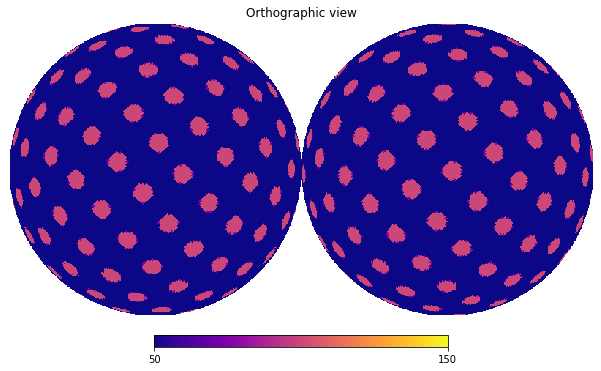

In [70]:
hp.orthview(hp.ud_grade(map_1,nside2),cmap='plasma',min=50,max=150)

In [71]:
#map_2=np.zeros_like(map_1)
#map_3=np.zeros_like(map_1)
#map_5=np.zeros_like(map_1_small)
#map_6=np.zeros_like(map_1_small)
#vvec=np.ones(3)
#vvec[0]=0.5
#vvec[1]=0.5
#vvec[2]=0.5
#vmag=0.5 #units of c
#vvec=0.5*vvec/np.sqrt(np.dot(vvec,vvec))

In [72]:
#for i in range(0,50):
    #pix=random.randint(0,len(map_1)-1)
    #pix=hp.ang2pix()
    #add_polca(map_1,pix,nside,radius)

In [73]:
#hp.orthview(map_1,cmap='bwr_r',min=0,max=2)

In [74]:
#hp.mollview(hp.ud_grade(map_1,nside2),cmap='bwr_r',min=0,max=2)

In [75]:
map_6=[]
step=0.01
vvec_tot=np.arange(step,1,step)
for k in range(0,len(vvec_tot)):
    map_4=np.zeros_like(map_1)
    vvec=np.ones(3)
    vvec[0]=0.5
    vvec[1]=0.22
    vvec[2]=0.27
    vmag=vvec_tot[k]
    vvec=vvec_tot[k]*vvec/np.sqrt(np.dot(vvec,vvec))
    for j in range(0,len(map_4)):
        nvec=hp.pix2vec(nside,j)
        nvec_new=ChangeDir3D_prim(nvec,vvec)
        pix_new=hp.vec2pix(nside,nvec_new[0],nvec_new[1],nvec_new[2])
        nu_val2=map_1[pix_new]
        nu_new2=ChangeColor3D_prim(nvec,nu_val2,vvec)
        map_4[j]=nu_new2
    map_5=map_4*1
    mask=np.where(map_5<0)
    map_5[mask]=-1.6375e+30
    map_6.append(map_5)
    #vel_name = "{:.2f}".format(vmag)
    #title_v=r'$v\ =\ $'+vel_name+'c'
    #hp.orthview(hp.ud_grade(map_5,nside),title=title_v,cmap='plasma')

In [76]:
# map_7=[]
# step=0.2
# vvec_tot=np.arange(step,1,step)
# for k in range(0,len(vvec_tot)):
#     map_4=np.zeros_like(map_1)
#     vvec=np.ones(3)
#     vvec[0]=vvec_tot[k]
#     vvec[1]=vvec_tot[k]
#     vvec[2]=vvec_tot[k]
#     vmag=vvec_tot[k]
#     vvec=vvec_tot[k]*vvec/np.sqrt(np.dot(vvec,vvec))
#     for j in range(0,len(map_4)):
#         nvec=hp.pix2vec(nside,j)
#         nvec_new=ChangeDir3D_prim(nvec,vvec)
#         pix_new=hp.vec2pix(nside,nvec_new[0],nvec_new[1],nvec_new[2])
#         nu_val2=map_1[pix_new]
#         nu_new2=ChangeColor3D_prim(nvec,nu_val2,vvec)
#         map_4[j]=nu_new2
#     map_5=map_4*1
#     mask=np.where(map_5<50)
#     map_5[mask]=-1.6375e+30
#     #map_7.append(map_5)
#     vel_name = "{:.2f}".format(vmag)
#     title_v=r'$v\ =\ $'+vel_name+'c'
#     hp.orthview(hp.ud_grade(map_4,nside),title=title_v,cmap='plasma')

In [77]:
#hp.mollview(hp.ud_grade(map_3,nside2),cmap='bwr_r',min=0,max=2)

In [78]:
#hp.mollview(hp.ud_grade(map_4,nside2),cmap='bwr_r',min=0,max=2)

In [79]:
#hp.mollview(hp.ud_grade(map_4,nside2),cmap='plasma',min=50,max=150)

In [80]:
#hp.orthview(hp.ud_grade(map_2,nside2),cmap='bwr_r',min=0,max=2)

In [81]:
#hp.orthview(hp.ud_grade(map_3,nside2),cmap='bwr_r',min=0,max=2)

In [82]:
#hp.orthview(hp.ud_grade(map_4,nside2),cmap='bwr_r',min=0,max=2)

In [83]:
#hp.orthview(hp.ud_grade(map_4,nside),cmap='plasma',min=50,max=150)

In [84]:
#hp.orthview(hp.ud_grade(map_1,nside2),cmap='plasma',min=50,max=150)

In [85]:
#map_5=map_4*1
#mask=np.where(map_5<50)
#map_5[mask]=-1.6375e+30

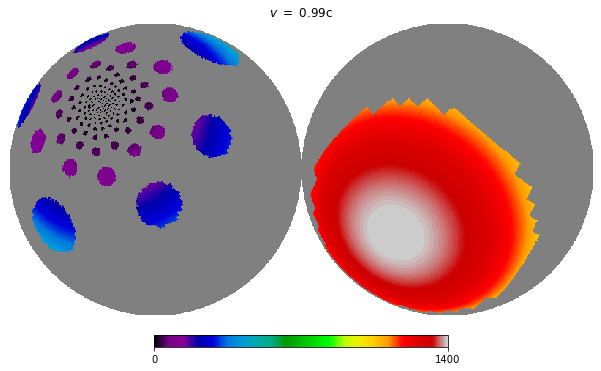

In [86]:
i=98
vmag=vvec_tot[i]
vel_name = "{:.2f}".format(vmag)
title_v=r'$v\ =\ $'+vel_name+'c'
hp.orthview(hp.ud_grade(map_6[i],nside),title=title_v,cmap='nipy_spectral',min=0,max=1400)

In [87]:
len(map_6)

99

In [88]:
len(map_6[0])

196608

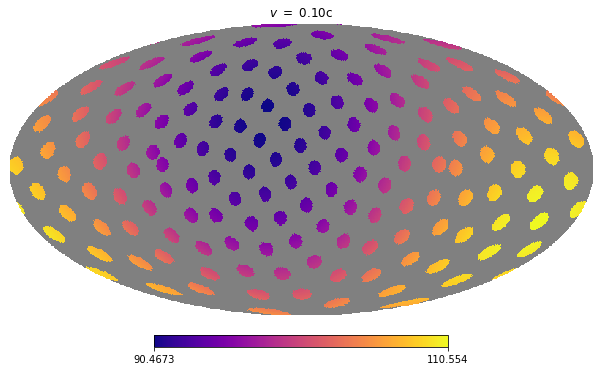

In [89]:
i=9
vmag=vvec_tot[i]
vel_name = "{:.2f}".format(vmag)
title_v=r'$v\ =\ $'+vel_name+'c'
hp.mollview(hp.ud_grade(map_6[i],nside),title=title_v,cmap='plasma')

In [90]:
map_2=map_1*1
mask=np.where(map_1<0)
map_2[mask]=-1.6375e+30
frames=[]
frame=plot(0,map_2,nside)
frames.append(frame)
frames.append(frame)
frames.append(frame)
for i in range(len(map_6)):
    frame=plot(vvec_tot[i],map_6[i],nside)
    frames.append(frame)
frames.append(frame)
frames.append(frame)
frames.append(frame)
gif.save(frames, 'example2.gif', duration=10,unit='s',between="startend")